Hand Writing

In [1]:
#!pip install opencv-python

In [2]:
#import cv2

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


C:\Users\johnl\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\johnl\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\johnl\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\johnl\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

### Read in data

In [4]:
data = pd.read_csv(r"C:\Users\johnl\Documents\Hand_Writing\A_Z Handwritten Data.csv").astype('int32')

## Split data

In [5]:
X = data.drop('0',axis = 1)
y = data['0']

## Data Reshaping
(n_images, x_shape, y_shape,channels)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(train_x)

train_x = standard_scaler.transform(train_x)
test_x = standard_scaler.transform(test_x)


In [8]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

As our target has 26 unique values its obvious that its a one to one map so that 0 goes to A and 1 goes to B etc

### Letter Map

In [9]:
letter_map ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [10]:
import seaborn as sns

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G'),
 Text(0, 0, 'H'),
 Text(0, 0, 'I'),
 Text(0, 0, 'J'),
 Text(0, 0, 'K'),
 Text(0, 0, 'L'),
 Text(0, 0, 'M'),
 Text(0, 0, 'N'),
 Text(0, 0, 'O'),
 Text(0, 0, 'P'),
 Text(0, 0, 'Q'),
 Text(0, 0, 'R'),
 Text(0, 0, 'S'),
 Text(0, 0, 'T'),
 Text(0, 0, 'U'),
 Text(0, 0, 'V'),
 Text(0, 0, 'W'),
 Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'Z')]

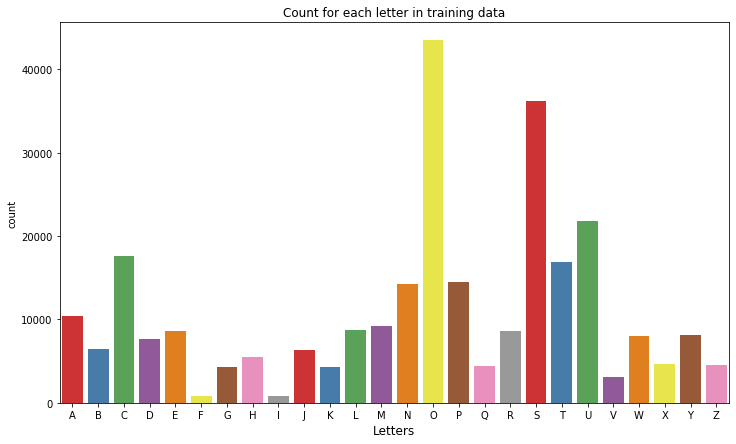

In [11]:
fig,ax=plt.subplots(figsize=(12,7))
letters= []
for i in letter_map.values():
    letters.append(i)
ax = sns.countplot(x=train_y,palette="Set1")
ax.set_xlabel("Letters",size=12)
ax.set_title("Count for each letter in training data")
ax.set_xticklabels(labels = letters)


### Shuffle Data

In [12]:
'''
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()
'''

"\nfrom sklearn.utils import shuffle\n\nX_shuffle = shuffle(X)\n\nplt.figure(figsize = (12,10))\nrow, colums = 4, 4\nfor i in range(16):  \n    plt.subplot(colums, row, i+1)\n    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')\nplt.show()\n"

In [13]:
'''
print("Data after scaler")
X_shuffle = shuffle(train_x)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()
'''

'\nprint("Data after scaler")\nX_shuffle = shuffle(train_x)\n\nplt.figure(figsize = (12,10))\nrow, colums = 4, 4\nfor i in range(16):  \n    plt.subplot(colums, row, i+1)\n    plt.imshow(X_shuffle[i].reshape(28,28),interpolation=\'nearest\', cmap=\'Greys\')\nplt.show()\n'

In [14]:
X_train = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
X_test = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')


y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)
print("Train data shape: ", X_train.shape)
print("Test data shape: ",X_test.shape)


Train data shape:  (279337, 28, 28, 1)
Test data shape:  (93113, 28, 28, 1)


In [15]:
import keras

In [19]:
cls =keras.models.load_model(r"model_hand.h5")

In [27]:
def make_model(batch_size = None):
    model= Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(y.unique()), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=batch_size, verbose=2)

    scores = model.evaluate(X_test,y_test, verbose=0)
    print("CNN Score:",scores[1])
    return model


Train on 279337 samples, validate on 93113 samples
Epoch 1/2
 - 105s - loss: 0.2343 - accuracy: 0.9341 - val_loss: 0.0915 - val_accuracy: 0.9760
Epoch 2/2
 - 107s - loss: 0.0869 - accuracy: 0.9754 - val_loss: 0.0729 - val_accuracy: 0.9812
CNN Score: 0.9811519384384155


In [ ]:
tf.keras.backend.clear_session()
training_model = make_model(batch_size = 128)
training_model.summary()

In [2]:
import os
# This address identifies the TPU we'll use when configuring TensorFlow.
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    training_model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()

KeyError: 'COLAB_TPU_ADDR'

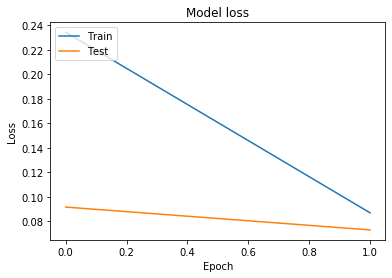

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
model.summary()
model.model.save(r'model_handwriting.h5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

C:\Users\johnl\Anaconda\lib\site-packages\keras\engine\sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


# Predictions on Test Data

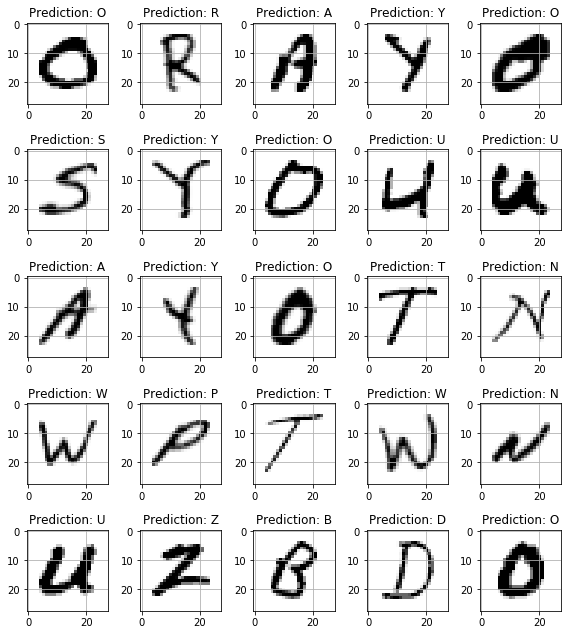

In [31]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letter_map[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred)
    fig.tight_layout() 
    ax.grid()

# External Example 

In [ ]:
break

In [32]:
import cv2

In [38]:
img_a = cv2.imread(r'C:\Users\johnl\Documents\letter k.jpg')
img_copy = img_a.copy()

img = cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_a, (400,440))
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)

In [39]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [40]:
img_pred = letter_map[np.argmax(cls.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)


In [1]:
while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined